In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.5.8 installed at /home/clemente/Amuse-env/lib/python3.10/site-packages/camb


In [2]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054
kmax=10 

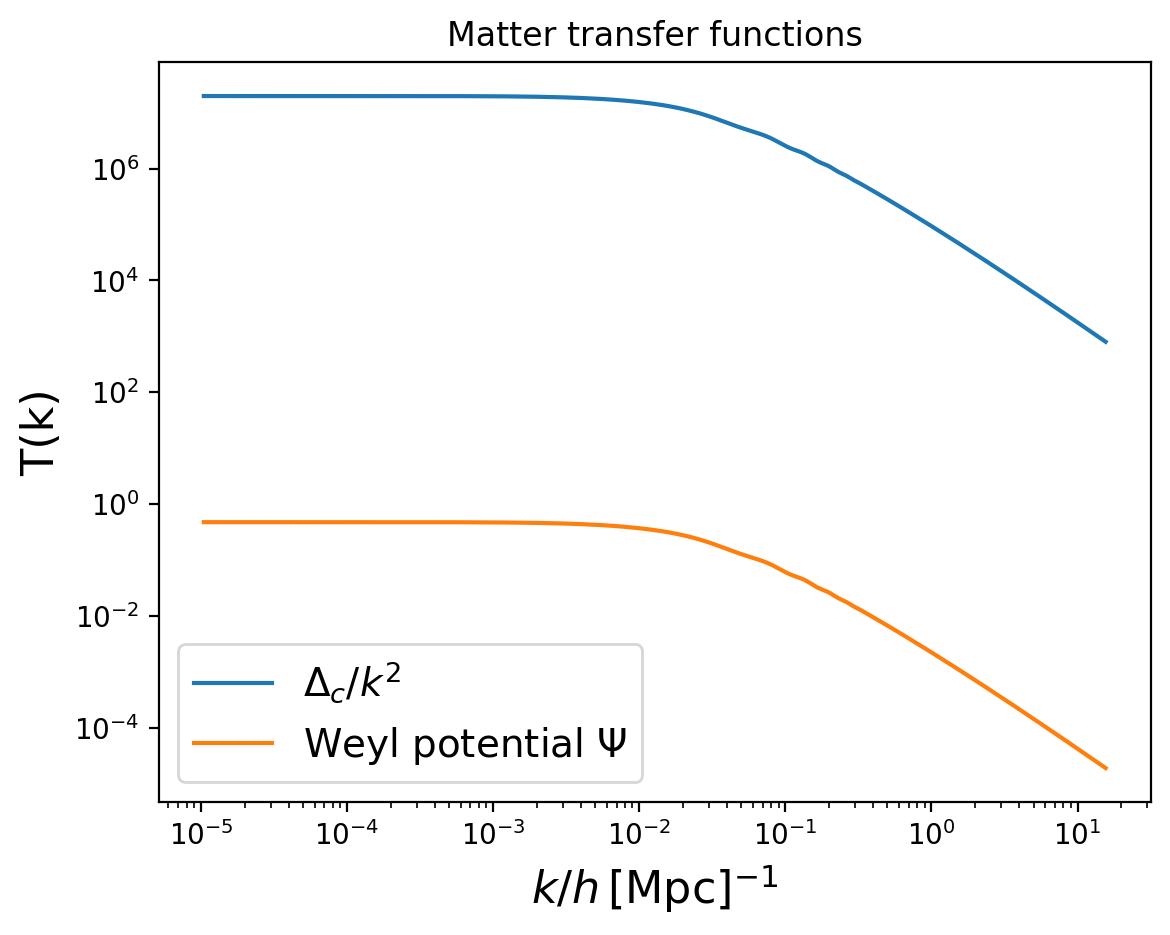

In [9]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

# Podemos cambiar algún parámetro después de fijar el modelo.

pars.set_dark_energy(w=-1);

pars.InitPower.set_params(ns=ns)

pars.set_matter_power(redshifts=[0], kmax=kmax)

results= camb.get_results(pars)

trans = results.get_matter_transfer_data()

#get kh - the values of k/h at which they are calculated
kh = trans.transfer_data[0,:,0]

#transfer functions for different variables, e.g. CDM density and the Weyl potential
#CDM perturbations have grown, Weyl is O(1) of primordial value on large scales
delta = trans.transfer_data[model.Transfer_cdm-1,:,0]
W = trans.transfer_data[model.Transfer_Weyl-1,:,0]
plt.plot(kh,delta)
plt.loglog(kh,-W)
plt.ylabel("T(k)", fontsize=16)
plt.xlabel(r'$k/h\, [\rm Mpc]^{-1}$', fontsize=16);
plt.title('Matter transfer functions')
plt.legend([r'$\Delta_c/k^2$',r'Weyl potential $\Psi$'], fontsize=14);

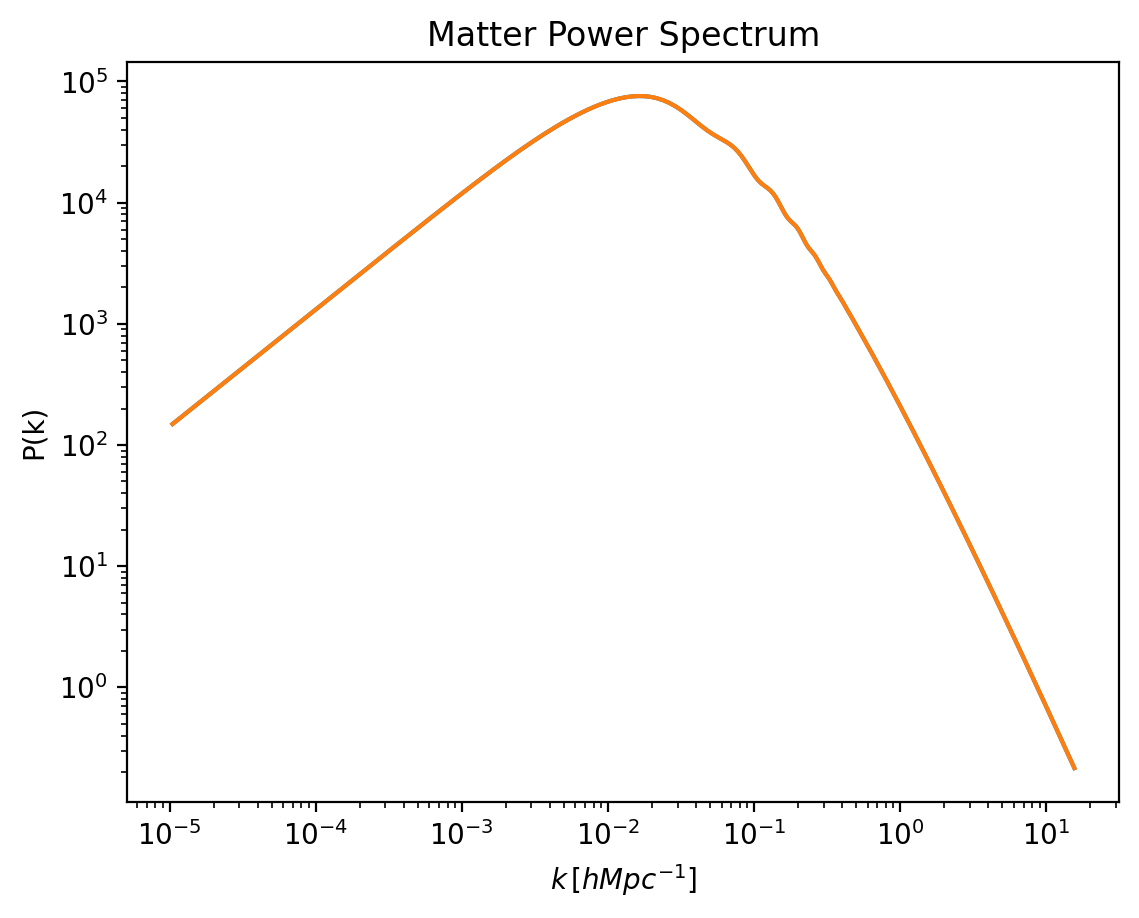

In [5]:
#Check we can get the matter power spectrum from the transfer function as expected
k = kh*results.Params.h
transfer = trans.transfer_data[model.Transfer_tot-1,:,0]
primordial_PK = results.Params.scalar_power(k)
matter_power = primordial_PK*transfer**2*k**4 / (k**3/(2*np.pi**2))

#compare with CAMB's explicit output for the matter power spectrum
kh2,zs,PK = results.get_linear_matter_power_spectrum(hubble_units=False)

plt.loglog(kh,matter_power)
plt.loglog(kh, PK[0,:]);
plt.title("Matter Power Spectrum")
plt.ylabel("P(k)")
plt.xlabel(r'$k\, [h Mpc^{-1}]$');